## DECISION TREE

#### Objective:
The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.


#### 1. Data Preparation

##### Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
# Load the given dataset 
df= pd.read_excel(r"C:\Users\akhil\Documents\AKHIL\Data Science\Assignments\Decision Tree\heart_disease.xlsx",sheet_name=1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [7]:
df.shape

(908, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


We have a total of 13 columns

5 columns are of int type
6 are of object type or categorical type
1 is of float type
1 is of boolean type

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,908.0,53.791850,9.158031,29.0,47.75,54.0,60.0,77.0
trestbps,908.0,133.430617,20.401608,0.0,120.00,130.0,144.0,200.0
chol,908.0,201.484581,112.097949,0.0,176.75,224.0,270.0,603.0
thalch,908.0,135.957048,26.804929,60.0,118.00,138.0,156.0,202.0
oldpeak,846.0,0.891253,1.093875,-2.6,0.00,0.5,1.5,6.2
num,908.0,1.008811,1.144436,0.0,0.00,1.0,2.0,4.0


#### 2. Exploratory Data Analysis (EDA):

#### Perform exploratory data analysis to understand the structure of the dataset.
#### Check for missing values, outliers, and inconsistencies in the data.
#### Visualize the distribution of features, including histograms, box plots, and correlation matrices.


In [13]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [15]:
df.duplicated().sum()

1

In [16]:
df.nunique()

age          49
sex           2
cp            4
trestbps     85
chol        228
fbs           2
restecg       3
thalch      122
exang         4
oldpeak      53
slope         3
thal          3
num           5
dtype: int64

In [17]:
num_col=[i for i in df.columns if df[i].dtype!='O']
num_col

['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num']

In [18]:
obj_col=[i for i in df.columns if df[i].dtype=='O']
obj_col

['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

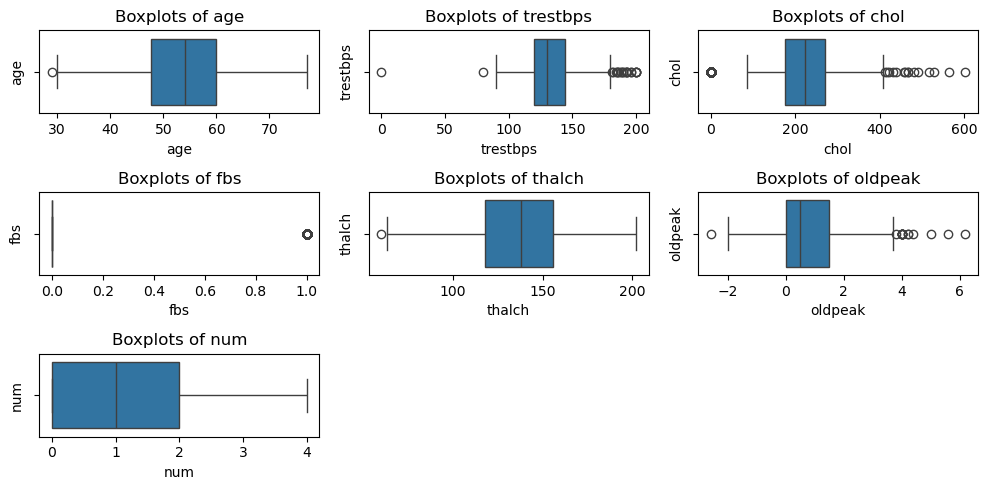

In [19]:
# Ploting the box plots to detect the outliers
plt.figure(figsize=(10,5))
index=1
for col in num_col:
    plt.subplot(3,3,index)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplots of {col}')
    index+=1
    plt.ylabel(col)
plt.tight_layout()
plt.show()
    

By looking at the above boxplots we can conclude that tretbps,chol and oldpeak columns contains outliers.

Now we will be removing those outliers using Outlier Capping method.

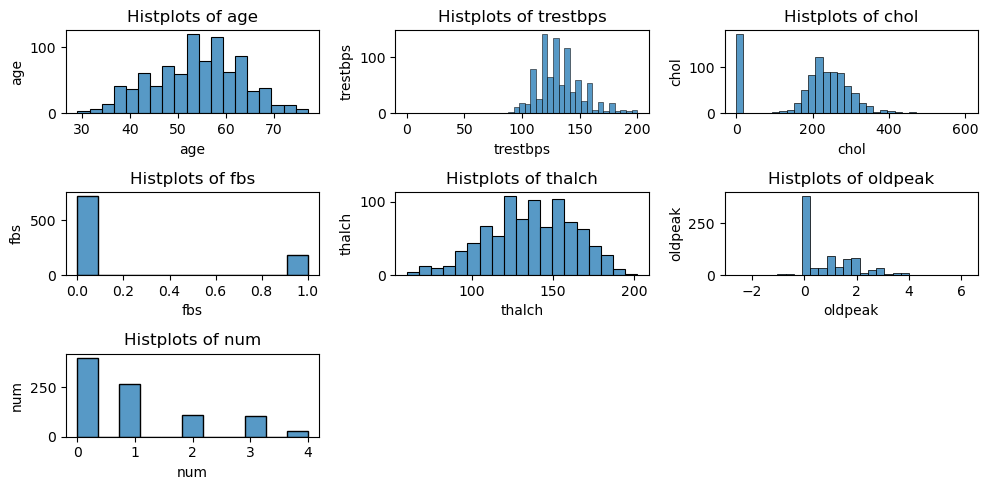

In [21]:
# Ploting the hist plots to detect the outliers
plt.figure(figsize=(10,5))
index=1
for col in num_col:
    plt.subplot(3,3,index)
    sns.histplot(x=df[col])
    plt.title(f'Histplots of {col}')
    index+=1
    plt.ylabel(col)
plt.tight_layout()
plt.show()

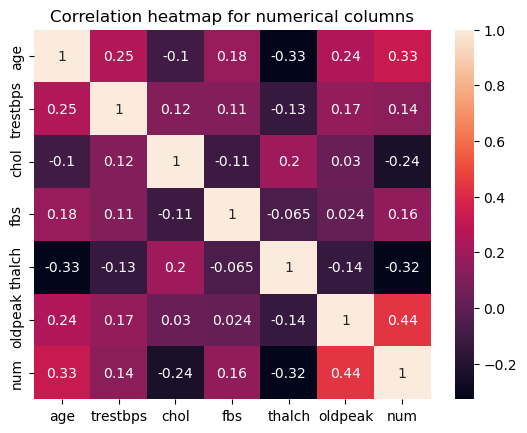

In [22]:
# let's plot correlation matrix for numerical columns
z=df.corr(numeric_only=True)
sns.heatmap((z),  cbar="True", annot=True)
plt.title("Correlation heatmap for numerical columns")
plt.show()

By looking the correlation matrix we can say that the columns are not highly correlated.

#### 3. Feature Engineering:
##### If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.


In [25]:
num_col, obj_col

(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num'],
 ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'])

In [26]:
df.dropna(inplace=True)
df.shape

(846, 13)

In [27]:
# Let's remove the above selected outliers from boxplot
def remove_outliers(df, column): #function to remove outliers
    Q1 = df[column].quantile(0.25)  #defining Q1 
    Q3 = df[column].quantile(0.75)  #defining Q3
    IQR = Q3 - Q1  #defining IQR
    lower_bound = Q1 - 1.5 * IQR #calculating lower bound
    upper_bound = Q3 + 1.5 * IQR #calculating upper bound
    return df[(df[column] >= lower_bound)] #returning all the rows with greater than lower bound only since that is what we decided from boxplots
  # We are assuming that columns having more value than IQR reveal some important obsetvation so we'll avoid removing it
print("Dataset size before removing outliers: ", df.shape)
for col in ['trestbps','chol','oldpeak']:
    df = remove_outliers(df, col)   # calling the function
print("Dataset size after removing outliers: ", df.shape)

Dataset size before removing outliers:  (846, 13)
Dataset size after removing outliers:  (689, 13)


In [28]:
df.nunique()
df['exang'].value_counts()

exang
False    429
True     259
FALSE      1
Name: count, dtype: int64

In [29]:
df['exang'].unique()

array([False, True, 'FALSE'], dtype=object)

In [30]:
#converting that inconsistent value which we see above.
df['exang'] = df['exang'].replace({'FALSE':False})
df['exang'].unique()

C:\Users\akhil\AppData\Local\Temp\ipykernel_27924\863015565.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].replace({'FALSE':False})


array([False,  True])

In [31]:
# Let's convert categorical columns to numerical column for our ML model.
# We'll be using LabelEncoder for this task
from sklearn.preprocessing import LabelEncoder

for col in obj_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,0,2.3,0,0,0
1,41,1,1,135,203,False,1,132,0,0.0,1,0,0
2,57,1,0,140,192,False,1,148,0,0.4,1,0,0
3,52,1,3,118,186,False,0,190,0,0.0,1,0,0
4,57,1,0,110,201,False,1,126,1,1.5,1,0,0


In [32]:
# Feature extraction
x = df.drop('num', axis=1)    # features all cols except 'num'
y = df['num']                 # target column 0 indicate no heart disease, 1,2,3,4 indicates presence of heart disease
x.shape, y.shape

((689, 12), (689,))

In [33]:
# Let's scale all the columns for better understanding and fast training of the model.
# We'll be using standard scaler for this example
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 1.11193162,  0.59243598,  2.30272432, ...,  1.26966927,
        -1.69214763, -1.64800896],
       [-1.29312824,  0.59243598,  0.19151067, ..., -0.82795885,
        -0.24383742, -1.64800896],
       [ 0.4560062 ,  0.59243598, -0.86409615, ..., -0.46315396,
        -0.24383742, -1.64800896],
       ...,
       [ 0.89328981,  0.59243598, -0.86409615, ...,  0.9960656 ,
        -1.69214763,  1.13844055],
       [ 1.00261072,  0.59243598, -0.86409615, ...,  1.90807783,
        -0.24383742, -0.25478421],
       [ 1.00261072,  0.59243598, -0.86409615, ...,  1.90807783,
        -0.24383742,  1.13844055]])

### 4. Decision Tree Classification:

#### Split the dataset into training and testing sets (e.g., using an 80-20 split).

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((551, 12), (138, 12), (551,), (138,))

##### Implement a Decision Tree Classification model using a library like scikit-learn.

In [38]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [39]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [40]:
y_pred = model.predict(x_test)
y_pred

array([0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 4, 0, 2, 0, 1, 0, 2, 0, 2, 3, 0, 0,
       0, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 0, 4, 1, 0, 0, 3, 1, 1, 2,
       0, 2, 0, 0, 0, 0, 1, 1, 0, 3, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 2, 1, 0, 0, 0, 0, 3, 3, 1, 3, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 3, 1, 0, 2, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Testing Accuracy Score : ",accuracy_score(y_pred, y_test))
print("Testing Precision Score : ",precision_score(y_pred, y_test, average='weighted'))
print("Testing Recall Score : ",recall_score(y_pred, y_test, average='weighted'))
print("Testing F1 Score : ",f1_score(y_pred, y_test, average='weighted'))

Testing Accuracy Score :  0.6304347826086957
Testing Precision Score :  0.652370009498422
Testing Recall Score :  0.6304347826086957
Testing F1 Score :  0.6220791363848867


In [42]:
#let's built a classification report and evaluate all the require parametrics
from sklearn.metrics import classification_report

print("Classification Report : \n",classification_report(y_pred, y_test))

Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.89      0.82        74
           1       0.59      0.33      0.42        40
           2       0.56      0.33      0.42        15
           3       0.13      0.29      0.18         7
           4       0.17      0.50      0.25         2

    accuracy                           0.63       138
   macro avg       0.44      0.47      0.42       138
weighted avg       0.65      0.63      0.62       138



#### 5. Hyperparameter Tuning:

##### Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

In [45]:
# Let's do this using Grid Search CV
# Let's define the model first
model = DecisionTreeClassifier(random_state=4)
model

DecisionTreeClassifier(random_state=4)

In [46]:
# let's define parameter girds
params = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [None, 5, 10, 15, 20],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 5]
}

In [47]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator = model,
    param_grid = params,
    cv = 5,
    scoring='accuracy',
    verbose=1,
    n_jobs=1
)
grid

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=4), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [48]:
#fit the grid search model
grid.fit(x_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=4), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [49]:
#finding the best parameters
print("Best Parameters are : ",grid.best_params_)
print("Best Score found is : ",grid.best_score_)

Best Parameters are :  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Score found is :  0.5735462735462736


Above is the best parameter for the model to form the best possible model based on given parameters

#### 6. Model Evaluation and Analysis:

##### Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

In [53]:
#let's form the best model obtained from grid search cv
best_model = grid.best_estimator_
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=4)

In [54]:
print("training Accuracy : ", accuracy_score(best_model.predict(x_train), y_train))
print("Test Accuracy : ", accuracy_score(best_model.predict(x_test), y_test))

training Accuracy :  0.6932849364791288
Test Accuracy :  0.6376811594202898


There is quite a difference in the taining and testing accuracy it may tend to overfit the model

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Testing Accuracy Score : ",accuracy_score(y_pred, y_test))
print("Testing Precision Score : ",precision_score(y_pred, y_test, average='weighted'))
print("Testing Recall Score : ",recall_score(y_pred, y_test, average='weighted'))
print("Testing F1 Score : ",f1_score(y_pred, y_test, average='weighted'))

Testing Accuracy Score :  0.6304347826086957
Testing Precision Score :  0.652370009498422
Testing Recall Score :  0.6304347826086957
Testing F1 Score :  0.6220791363848867


In [57]:
# Classification Report of the best model formed
print("Classification Report:\n", classification_report(best_model.predict(x_test), y_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85        83
           1       0.68      0.33      0.45        45
           2       0.00      0.00      0.00         1
           3       0.07      0.17      0.10         6
           4       0.00      0.00      0.00         3

    accuracy                           0.64       138
   macro avg       0.32      0.27      0.28       138
weighted avg       0.73      0.64      0.66       138



##### Visualize the decision tree structure to understand the rules learned by the model and identify important features

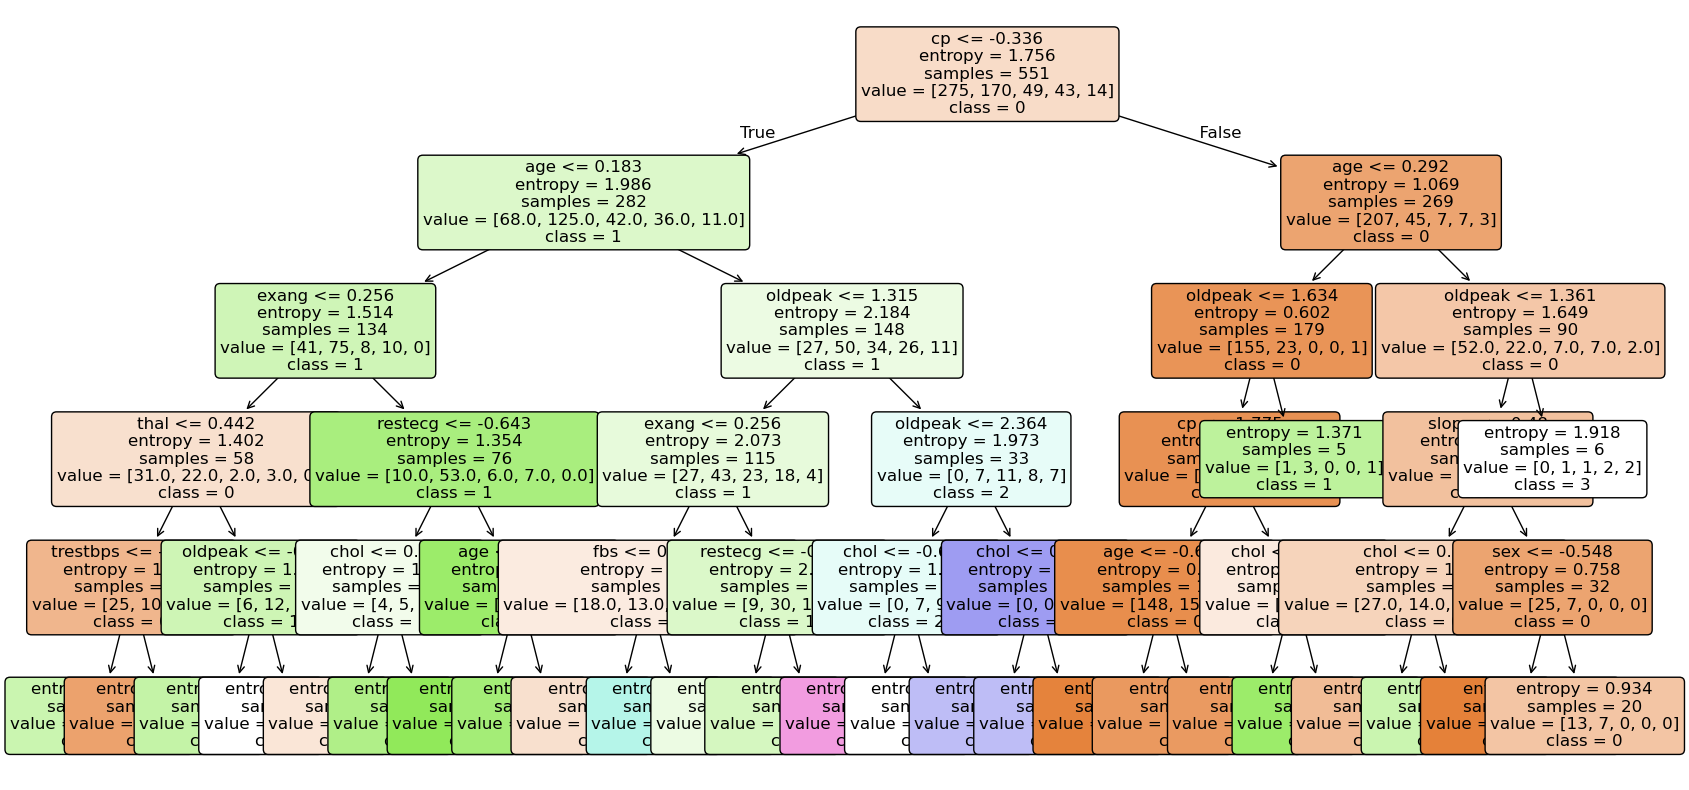

In [60]:
from sklearn.tree import plot_tree

# Assuming 'best_model' is your trained DecisionTreeClassifier
plt.figure(figsize=(20, 10))
plot_tree(
    best_model,                                   # Trained decision tree model
    feature_names=df.columns,                  # Column names from the feature matrix
    class_names=best_model.classes_.astype(str),  # Class labels
    filled=True,                                  # Add colors to indicate purity
    rounded=True,                                 # Rounded corners
    fontsize=12                                   # Font size
)
plt.show()

We infer that:

* The model chose cp as the root node, so we can say cp is the most important feature chosen by the model meaning the cp has the highest information gain.
* The features at the top indicates that the model chose those as more important features like cp, age, exang, oldpeak and so on.
* sex and slopes are less important features.
* value showing some list of samples means distribution of each class.
* gini value is the importance score given to the feature.
* We can see that the model is having many branches so it may tend to overfit the model.

### Interview Questions:
#### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
#### ANSWER

* Max Depth : Limits the depth of the tree
* Min Samples Split : specifies the minimum samples of split in an internal node.
* Min Samples Leaf : The minimum number of samples required to be at the leaf nodes. Larger numbers are better for this since it reduces overfitting.
* Max Features : Limits the number of features to consider for a split. smaller value is better since it reduces the complexity and overfitting.
* Criterion : The function to measure the quality of a split
* Splitter : Determines the strategy used to split at each node like "best" or "random". It affects the tree's construction speed and quality.
                                                                                                              
                                                                                                              
#### 2. What is the difference between the Label encoding and One-hot encoding?
ANSWER

* Label Encoding: Converts each category into a unique integer label.

* This method is useful for ordinal data may introduce unintended ordinal relationships in nominal data
* Simple to implement for large number of unique values.
* One Hot Encoding: Converts each category into binary vector (one element is 1 and rest are 0).

* It is more suitable for nominal data as it doesn't imply any ordinal relationship between categories.
* Difficult to handle column with large number of categories.